In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_calendar=pd.read_csv('/kaggle/input/seattle/calendar.csv')
df_listing=pd.read_csv('/kaggle/input/seattle/listings.csv')

# DATA UNDERSTANDING AND PREPARING

In [9]:
# UNDERSTANDING df_calendar 
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


####  All columns except 'price' have all non-null values
####  'date' column is divided into months and years
####  'available' column is converted to 1 and 0  
####  Remove the '$' symbol and change String to Float from 'price' column

In [11]:
print("Rows = {} ".format(df_calendar.shape[0]))
print("Columns = {}".format(df_calendar.shape[1]))

Rows = 1393570 
Columns = 4


In [12]:
# PREPARING df_calendar

df_calendar['month']=pd.DatetimeIndex(df_calendar['date']).month
df_calendar['year']=pd.DatetimeIndex(df_calendar['date']).year
df_calendar['Month_Year']=pd.to_datetime(df_calendar['date']).dt.to_period('M')

df_calendar['available'].replace({'t':1,'f':0},inplace=True)

df_calendar['price']=df_calendar['price'].map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)

In [13]:
#Check del número de filas es el mismo y el numero de columnas ha aumentado en 3 y la columna Price es tipo float
print("Rows = {} ".format(df_calendar.shape[0]))
print("Columns = {}".format(df_calendar.shape[1]))
df_calendar.info()

Rows = 1393570 
Columns = 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype    
---  ------      --------------    -----    
 0   listing_id  1393570 non-null  int64    
 1   date        1393570 non-null  object   
 2   available   1393570 non-null  int64    
 3   price       934542 non-null   float64  
 4   month       1393570 non-null  int64    
 5   year        1393570 non-null  int64    
 6   Month_Year  1393570 non-null  period[M]
dtypes: float64(1), int64(4), object(1), period[M](1)
memory usage: 74.4+ MB


In [14]:
# UNDERSTANDING df_listing 
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


####  'square_feet' and 'license' columns have most of the fields null, so we can remove them
####  Columns with descriptions or url doesn`t mind to work with them in thios case
####  Columns where we can do missing values: 'reviews_per_month, beds, bedrooms, bathrooms', since from the rest they can be obtained quite precisely
####  Columns 'space,property_type,host_name,host_is_superhost' can be obtained with Mode since they are Categorical Variables and the missing values are not many
####  Remove the '$' symbol and change String to Float from 'price' column

In [15]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [16]:
# PREPARING df_listing

# 1. Removing the columns 
df_listing.drop(columns=['square_feet','license'],inplace=True)

# numerical missing values columns 
df_listing['beds'].fillna(df_listing['beds'].mean(),inplace=True)
df_listing['bedrooms'].fillna(df_listing['bedrooms'].mean(),inplace=True)
df_listing['bathrooms'].fillna(df_listing['bathrooms'].mean(),inplace=True)

# 2. Categorical missing values columns 
df_listing['space'].fillna(df_listing['space'].mode()[0],inplace=True)
df_listing['property_type'].fillna(df_listing['property_type'].mode()[0],inplace=True)
df_listing['host_name'].fillna(df_listing['host_name'].mode()[0],inplace=True)
df_listing['host_is_superhost'].fillna(df_listing['host_is_superhost'].mode()[0],inplace=True)

# 3. Removing the '$' symbol and change String to Float

df_listing['price']=df_listing['price'].map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
df_listing['weekly_price']=df_listing['weekly_price'].map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
df_listing['monthly_price']=df_listing['monthly_price'].map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
df_listing['security_deposit'] =df_listing['security_deposit'] .map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
df_listing['cleaning_fee'] =df_listing['cleaning_fee'] .map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
df_listing['extra_people'] =df_listing['extra_people'] .map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)

In [17]:
# Check again df_listing cleaned and changed String to Float
print("Rows = {} ".format(df_listing.shape[0]))
print("Columns = {}".format(df_listing.shape[1]))
df_listing.info()

Rows = 3818 
Columns = 90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3818 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-

# DATA MODELING AND INSIGHTS

### 1. The busiest month in terms of availbility of listings

#### By Year

In [18]:
# Groupby by year and agregate by mean of the 'available' column, which takes values between 0 and 1. We can see the year with the highest occupancy.
# Data from only two years doesn't make sense
availability_year=df_calendar.groupby('year')['available'].mean().reset_index().rename(columns={'available':'mean_availability'})
availability_year.head()

,year,mean_availability
0,2016,0.670194
1,2017,0.746202


#### By Month

In [19]:
# Groupby by month and agregate by mean of the 'available' column, which takes values between 0 and 1. We can see the month with the highest occupancy
availability_month=df_calendar.groupby('month')['available'].mean().reset_index().rename(columns={'available':'mean_availability'})
availability_month.head()

,month,mean_availability
0,1,0.566937
1,2,0.662208
2,3,0.709187
3,4,0.663847
4,5,0.675670


In [20]:
x=availability_month['month']
y=availability_month['mean_availability']

<AxesSubplot:xlabel='month', ylabel='mean_availability'>

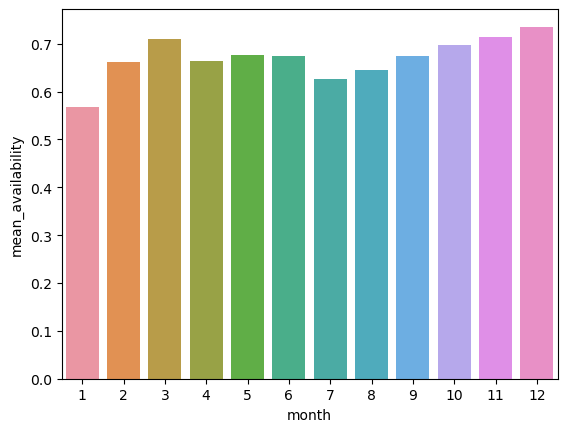

In [21]:
sns.barplot(data=availability_month,x='month',y='mean_availability')

Text(0.5, 1.0, 'availability per month')

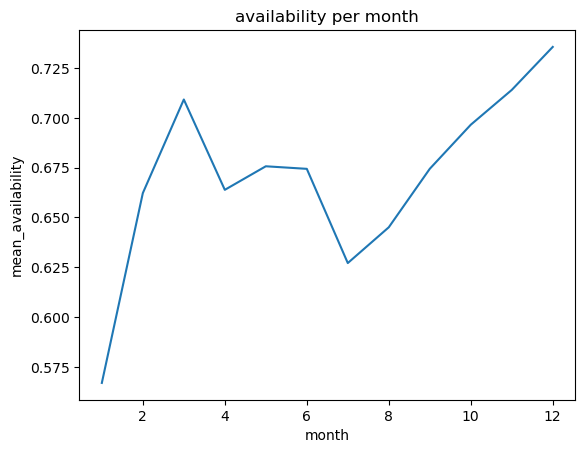

In [22]:
sns.lineplot(x = "month", y = "mean_availability", data = availability_month).set_title("availability per month")

In [23]:
availability_month.sort_values(by='mean_availability',ascending=False)

,month,mean_availability
11,12,0.735573
10,11,0.713986
2,3,0.709187
9,10,0.696514
4,5,0.675670
8,9,0.674402
5,6,0.674384
3,4,0.663847
1,2,0.662208
7,8,0.645051


#### The months with the highest availability correspond to the Christmas months. January is the month with the lowest availability

#### By Month_Year

In [24]:
# Groupby by Month_year and agregate by mean of the 'available' column, which takes values between 0 and 1
availability_monthyear=df_calendar.groupby('Month_Year')['available'].mean().reset_index().rename(columns={'available':'mean_availability'})
availability_monthyear.sort_values(by='mean_availability',ascending=False)

,Month_Year,mean_availability
12,2017-01,0.746202
11,2016-12,0.735573
10,2016-11,0.713986
2,2016-03,0.709187
9,2016-10,0.696514
4,2016-05,0.675670
8,2016-09,0.674402
5,2016-06,0.674384
3,2016-04,0.663847
1,2016-02,0.662208


In [25]:
x=availability_monthyear['Month_Year']
y=availability_monthyear['mean_availability']

<AxesSubplot:xlabel='Month_Year', ylabel='mean_availability'>

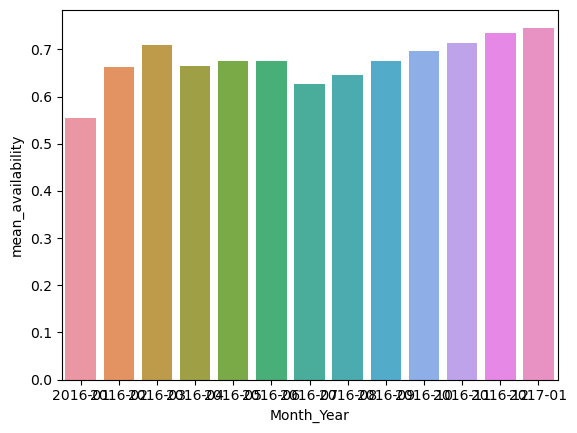

In [26]:
sns.barplot(data=availability_monthyear,x='Month_Year',y='mean_availability')

#### The month and year with the highest availability is January 2017. January of the previous year is the month with the lowest availability.

### 2. The highest mean price per night of listings

In [27]:
mean_price=df_calendar.groupby('month')['price'].mean().reset_index().rename(columns={'price':'mean_price'})

In [28]:
x=mean_price['month']
y=mean_price['mean_price']

Text(0.5, 1.0, 'average price per night and month')

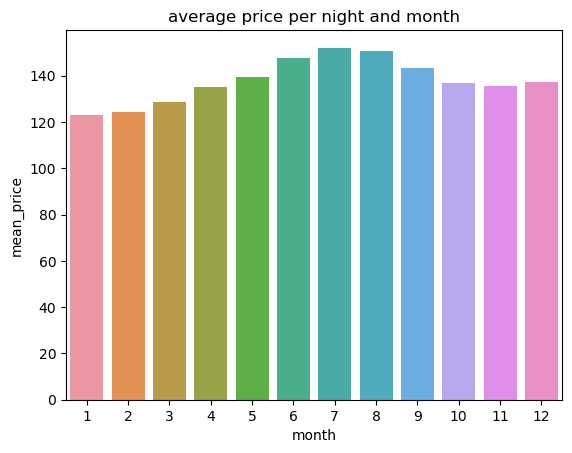

In [29]:
sns.barplot(data=mean_price,x='month',y='mean_price').set_title("average price per night and month")

Text(0.5, 1.0, 'average price per night and month')

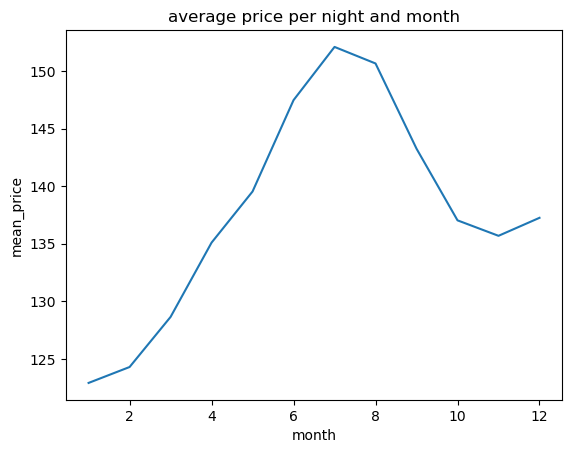

In [30]:
sns.lineplot(x = "month", y = "mean_price", data = mean_price).set_title("average price per night and month")

In [31]:
mean_price.sort_values(by='mean_price',ascending=False)

,month,mean_price
6,7,152.094150
7,8,150.656594
5,6,147.473137
8,9,143.255949
4,5,139.538183
11,12,137.251835
9,10,137.031939
10,11,135.688738
3,4,135.097005
2,3,128.644488


#### The month with the most expensive average price per night corresponds to the summer months (June, July and august)

### 3. The most expensive in terms of 'accomodate'

In [32]:
accommodates=df_listing.groupby('accommodates')['price'].mean().sort_values(ascending=False).reset_index().rename(columns={'price':'mean_price'})

In [33]:
x=accommodates['accommodates']
y=accommodates['mean_price']

Text(0.5, 1.0, 'Average price per accomodates')

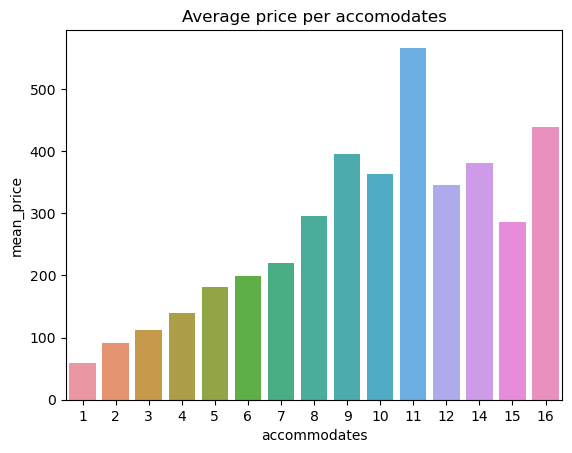

In [34]:
sns.barplot(data=accommodates,x='accommodates',y='mean_price').set_title("Average price per accomodates")

Text(0.5, 1.0, 'average price per accommodates')

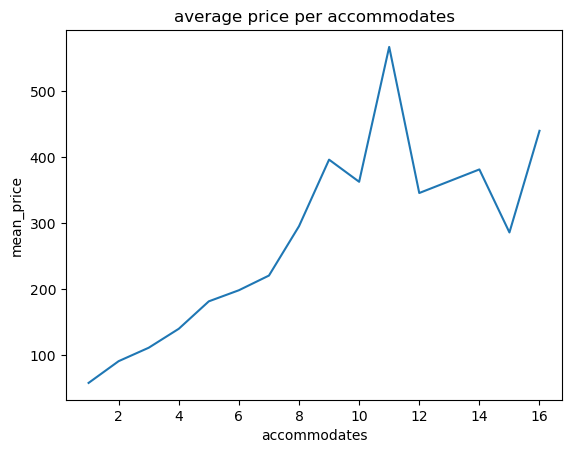

In [35]:
sns.lineplot(x = "accommodates", y = "mean_price", data = accommodates).set_title("average price per accommodates")

In [36]:
accommodates.sort_values(by='mean_price',ascending=False)

,accommodates,mean_price
0,11,566.666667
1,16,439.750000
2,9,396.153846
3,14,381.333333
4,10,362.640000
5,12,345.666667
6,8,295.478992
7,15,286.000000
8,7,220.788462
9,6,198.572289


#### Accommodations for 1-7 pax have the price in accordance with the number of pax. But above this, the maximum price is found for 11 pax and the rest is not directly in accordance to the price.

# CONCLUSION

#### The months with the highest availability correspond to the months of Christmas (November and December). January is the month with the lowest availability followed by the summer months (July and August)
#### The highest average price per night, we find it in the summer months (June, July and August), which coincide with those with less availability. It makes sense, since the lower the offer, the higher the price
#### The average price per accommodates, we can see that between 1-7 pax, the relationship is direct. But from there no, being 11 pax the highest average price, that is more high than a 16 pax accomodation